In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape


(100, 4)

In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


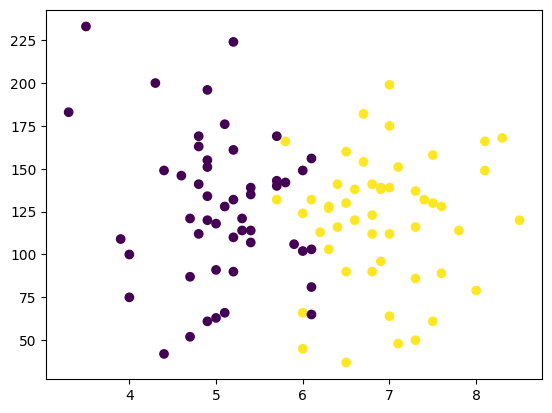

In [ ]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

Logistic Regression

In [ ]:
X=df.iloc[:,0:2]

In [ ]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [ ]:
Y=df.iloc[:,-1]

In [ ]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
55,7.8,114.0
45,6.0,66.0
47,5.2,161.0
64,7.0,64.0
23,4.7,87.0
...,...,...
5,7.1,48.0
19,5.2,132.0
96,4.4,42.0
44,7.5,61.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 1.61281582, -0.21176841],
       [-0.01304705, -1.41392286],
       [-0.73565277,  0.96534115],
       [ 0.8902101 , -1.46401262],
       [-1.18728134, -0.88798029],
       [ 0.43858153, -2.1402245 ],
       [ 0.07727867,  0.84011673],
       [ 0.34825581, -0.16167864],
       [-0.55500134,  0.4143537 ],
       [ 1.79346725, -1.08833936],
       [ 0.07727867, -1.43896774],
       [ 1.43216439,  0.13885997],
       [ 1.34183867,  0.18894974],
       [ 0.16760438, -0.23681329],
       [ 0.79988438, -0.66257633],
       [-1.18728134, -0.03645422],
       [-0.64532705, -0.21176841],
       [ 0.52890724, -0.0614991 ],
       [ 0.8902101 ,  0.4143537 ],
       [-0.28402419,  0.51453323],
       [-1.5485842 ,  1.94209164],
       [ 1.88379296,  0.66480254],
       [ 0.34825581,  0.46444347],
       [-1.00662991,  1.8419121 ],
       [-1.18728134, -1.76455124],
       [ 0.79988438,  0.38930881],
       [ 0.98053581,  0.71489231],
       [ 0.70955867, -0.26185818],
       [ 0.07727867,

In [ ]:
X_test=scaler.fit_transform(X_test)

In [ ]:
X_test

array([[-0.05853937,  0.96663003],
       [-1.37567523, -0.67636719],
       [ 1.99033863, -0.37515103],
       [-1.00980416,  0.41896429],
       [ 0.89272541,  1.78812864],
       [ 0.01463484,  0.88448017],
       [-0.57075887, -1.93599839],
       [-0.42441044, -0.6489839 ],
       [ 1.18542227, -0.04655159],
       [-0.64393308, -0.37515103]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
Y_test

,placement
84,0
31,0
69,1
88,0
26,1
85,1
7,0
92,0
3,1
22,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

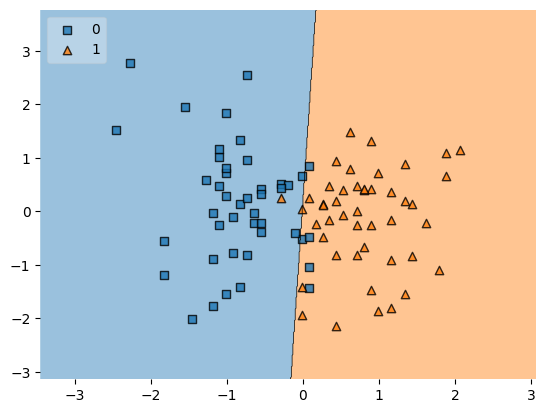

In [ ]:
plot_decision_regions(X_train ,Y_train.values,clf=clf,legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open("model.pkl","wb"))